In [1]:
from sympy import *
from sympy.abc import s, t

In [2]:
def PI(z,m,n):
    a = Symbol('beta',positive=True)
    aux = exp(-m*z)*Product((2**(k+1)/(a*z)*sinh(a*z/2**(k+1)))**(2**k), (k, 1, n)).doit()
    aux = aux.rewrite(exp).expand()
    return aux

In [3]:
init_session()

IPython console for SymPy 1.1.2.dev (Python 3.5.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev



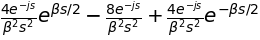

In [101]:
expr = PI(s,Symbol('j'),1)
expr

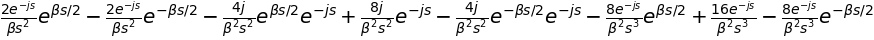

In [102]:
expr1 = diff(expr,s,1)
expr1

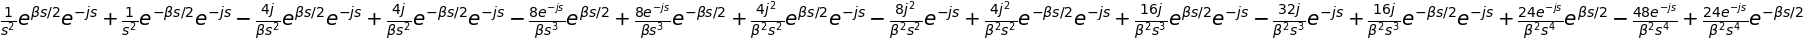

In [103]:
expr2 = diff(expr1,s,1)
expr2

In [105]:
expr2.simplify().limit(s,0)

In [13]:
limit(expr2,s,0)

In [56]:
A, c = symbols('A c')
j, beta, gamma = symbols('j beta gamma', positive=True)

expr = A/(beta*s)**n*exp(s*(c*beta-j))
expr

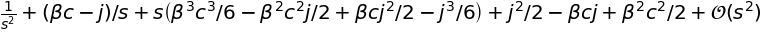

In [64]:
expr2 = 1/s**2*exp(-j*s+c*beta*s)
#expr2 = expr2.subs([[c,0]])
expr2.series(s,0,2)

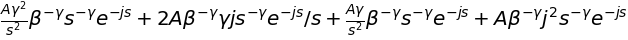

In [35]:
expr2 = expr2.subs([[c,0]])
expr2

In [36]:
limit(expr2,s,0)

In [38]:
expr = A/(beta*s)**gamma*exp(-j*s)
expr

In [39]:
limit(expr,s,0)

In [115]:
SeqFormula(factor(1/3*2**(-n - 2)*(-1 + 2**n)),(n,0,5))

[0, 0.0416666666666667, 0.0625, 0.0729166666666667, …]

In [141]:
s =SeqFormula(nsimplify(1/3*2**(-n - 2)*(-1 + 2**n)))

In [118]:
nsimplify(1/3*2**(-n - 2)*(-1 + 2**n))

In [150]:
1/nfloat(s.coeff(1000))

In [124]:
sequence(nsimplify(1/3*2**(-n - 2)*(-1 + 2**n))).find_linear_recurrence(10)

In [131]:
s = SeqPer((1/24,1/16,7/96),(0,5))

In [132]:
s

[0.0416666666666667, 0.0625, 0.0729166666666667, 0.0416666666666667, …]

In [154]:
nsimplify(s.coeff(6))

In [140]:
?solve

In [168]:
%%capture saida

%time a = nsimplify(s.coeff(6))

In [169]:
saida.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.23 ms


In [167]:
a

# Alguns cálculos para a tranformada em grandes fluxos, segundo momento para $n\rightarrow\infty$

In [200]:
PI = symbols('Pi', cls=Function)
j = Symbol('\\left<j\\right>')
beta = Symbol('\\beta')
a = Symbol('a', positive=True)
k, l, m, n = symbols('k l m n', integer=True)

In [95]:
sinh_k = sinh(beta*z/2**(k+1))
invz_k = 2**(k+1)/(beta*z)
prod_n = Product((invz_k*sinh_k)**(2**k),(k,1,n))

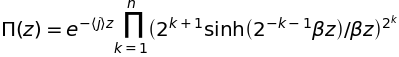

In [96]:
Eq(PI(z),exp(-j*z)*prod_n)

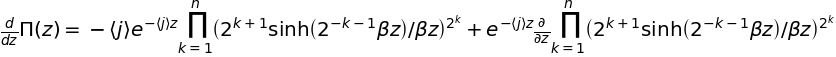

In [97]:

Eq(diff(PI(z),z),-j*exp(-j*z)*prod_n+diff(prod_n,z)*exp(-j*z))

In [254]:
Eq(diff(PI(z),z,2),
   j*j*exp(-j*z)*prod_n-j*exp(-j*z)*diff(prod_n,z)-
  j*exp(-j*z)*diff(prod_n,z)+exp(-j*z)*diff(prod_n,z,2))

'\\frac{d^{2}}{d z^{2}} \\Pi{\\left (z \\right )} = \\left<j\\right>^{2} e^{- \\left<j\\right> z} \\prod_{k=1}^{n} \\left(\\frac{2^{k + 1}}{\\beta z} \\sinh{\\left (2^{- k - 1} \\beta z \\right )}\\right)^{2^{k}} - 2 \\left<j\\right> e^{- \\left<j\\right> z} \\frac{\\partial}{\\partial z} \\prod_{k=1}^{n} \\left(\\frac{2^{k + 1}}{\\beta z} \\sinh{\\left (2^{- k - 1} \\beta z \\right )}\\right)^{2^{k}} + e^{- \\left<j\\right> z} \\frac{\\partial^{2}}{\\partial z^{2}} \\prod_{k=1}^{n} \\left(\\frac{2^{k + 1}}{\\beta z} \\sinh{\\left (2^{- k - 1} \\beta z \\right )}\\right)^{2^{k}}'

$$\frac{d^{2}}{d z^{2}} \Pi{\left (z \right )} = \left<j\right>^{2} e^{- \left<j\right> z} \prod_{k=1}^{n} \left(\frac{2^{k + 1}}{\beta z} \sinh{\left (2^{- k - 1} \beta z \right )}\right)^{2^{k}} - 2 \left<j\right> e^{- \left<j\right> z} \frac{\partial}{\partial z} \prod_{k=1}^{n} \left(\frac{2^{k + 1}}{\beta z} \sinh{\left (2^{- k - 1} \beta z \right )}\right)^{2^{k}} + e^{- \left<j\right> z} \frac{\partial^{2}}{\partial z^{2}} \prod_{k=1}^{n} \left(\frac{2^{k + 1}}{\beta z} \sinh{\left (2^{- k - 1} \beta z \right )}\right)^{2^{k}}$$

In [173]:
def invz(z,n):
    return 2**(n+1)/(beta*z)
def sinhz(z,n):
    return sinh(beta*z/2**(n+1))
def powis(z,n):
    return (invz(z,n)*sinhz(z,n))**(2**n)
def prodn(z,ini,fim):
    return product(powis(z,k),(k,ini,fim))

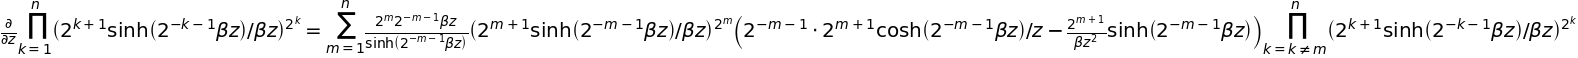

In [178]:
Eq(diff(prod_n,z), Sum(diff(powis(z,m),z)*prodn(z,Ne(k,m),n),(m,1,n)))

In [213]:
dPro = Sum(diff(powis(z,m),z)*prodn(z,Ne(k,m),n),(m,1,n))

In [214]:
dPro1 = Sum(diff(powis(z,m),z)*1,(m,1,n))

In [248]:
diff(powis(z,m),z).series(z,0,2)

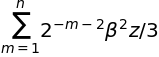

In [250]:
dPro12 = Sum(beta**2*z/3*2**(-m-2)*1,(m,1,n))
dPro12

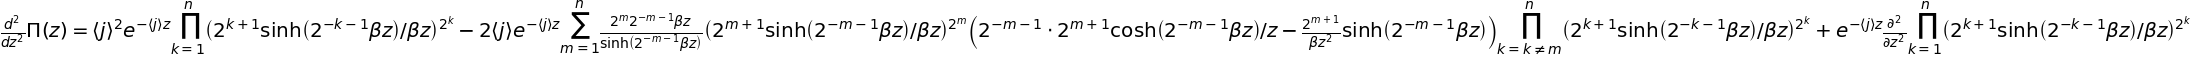

In [255]:
Eq(diff(PI(z),z,2),
   j*j*exp(-j*z)*prod_n
   -2*j*exp(-j*z)*dPro
   +exp(-j*z)*diff(prod_n,z,2))

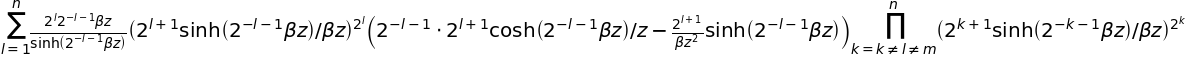

In [206]:
Sum(diff(powis(z,l),z)*prodn(z,Ne(k,Ne(l,m)),n),(l,1,n))

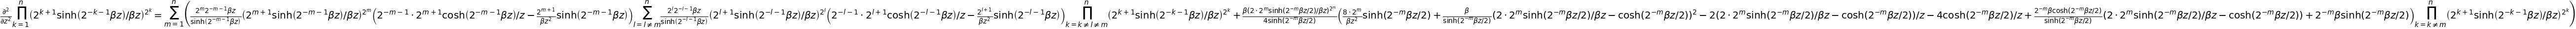

In [216]:
Eq(diff(prod_n,z,2), Sum(diff(powis(z,m),z,2)*prodn(z,Ne(k,m),n)+
                         diff(powis(z,m),z)*Sum(diff(powis(z,l),z)*prodn(z,Ne(k,Ne(l,m)),n),(l,Ne(l,m),n)),(m,1,n)))

In [ ]:
Sum(diff(powis(z,m),z,2)*prodn(z,Ne(k,m),n)+
                         diff(powis(z,m),z)*Sum(diff(powis(z,l),z)*prodn(z,Ne(k,Ne(l,m)),n),(l,Ne(l,m),n)),(m,1,n)))

In [238]:
diff(powis(z,m),z,2).series(z,0,2)

In [247]:
diff(powis(z,m),z).series(z,0,2)

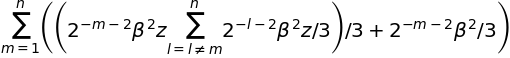

In [245]:
# observando a expanão do que está o somatório
d2Pro12 = Sum(beta**2/3*2**(-m-2)+
    (2**(-m - 2)*beta**2*z/3)*Sum((2**(-l - 2)*beta**2*z/3)*1,(l,Ne(l,m),n)),(m,1,n))
d2Pro12

In [260]:
d2Pro1 = Sum(diff(powis(z,m),z,2)*1+
             diff(powis(z,m),z)*Sum(diff(powis(z,l),z)*1,(l,Ne(l,m),n)),(m,1,n))

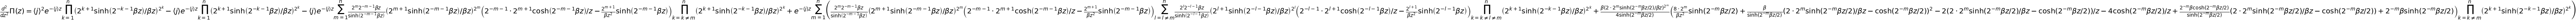

In [219]:
Eq(diff(PI(z),z,2),
   j*j*exp(-j*z)*prodn(z,1,n)
   -j*exp(-j*z)*dPro
   -j*exp(-j*z)*prodn(z,1,n)
   +exp(-j*z)*d2Pro)

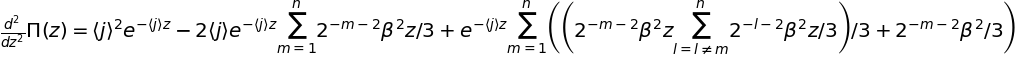

In [256]:
Eq(diff(PI(z),z,2),
   j*j*exp(-j*z)*1
   -2*j*exp(-j*z)*dPro12
   +exp(-j*z)*d2Pro12)

In [259]:
Eq(Subs(diff(PI(z),z,2),z,0),
   j*j+beta**2/12*Sum(1/2**m,(m,1,n)))

                           n                        
                          ___                       
                          ╲                         
                       2   ╲    -m                  
                  \beta ⋅  ╱   2                    
                          ╱                         
⎛  2      ⎞│              ‾‾‾                       
⎜ d       ⎟│             m = 1                     2
⎜───(Π(z))⎟│    = ──────────────── + \left<j\right> 
⎜  2      ⎟│             12                         
⎝dz       ⎠│z=0                                     